<a href="https://colab.research.google.com/github/anilbhatt1/Deep_Learning_EVA4_Phase2/blob/master/EVA4P2_S3_Facial_Alignment_5_pt_model_V1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Sat Aug 15 16:43:59 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.57       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P8    11W /  70W |      0MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
pip uninstall opencv-python

Uninstalling opencv-python-3.4.0.14:
  Would remove:
    /usr/local/lib/python3.6/dist-packages/cv2/*
    /usr/local/lib/python3.6/dist-packages/opencv_python-3.4.0.14.dist-info/*
Proceed (y/n)? y
  Successfully uninstalled opencv-python-3.4.0.14


#### estimateRigidTransform function is deprecated in opencv 4.1 version. Hence downgrading to opencv 3.4 version

In [3]:
pip install opencv-python==3.4.0.14

  Using cached https://files.pythonhosted.org/packages/e6/d1/732afb3a056d7e7f3af08f3fcb67a7c1ceedd6be941f8e3907da0400c36e/opencv_python-3.4.0.14-cp36-cp36m-manylinux1_x86_64.whl
ERROR: dopamine-rl 1.0.5 has requirement opencv-python>=3.4.1.15, but you'll have opencv-python 3.4.0.14 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.


In [4]:
pip install numpy opencv-python dlib imutils

In [5]:
#Download the 5-pt alignment file
!wget http://dlib.net/files/shape_predictor_5_face_landmarks.dat.bz2
!bzip2 -dk shape_predictor_5_face_landmarks.dat.bz2

--2020-08-15 16:04:05--  http://dlib.net/files/shape_predictor_5_face_landmarks.dat.bz2
Resolving dlib.net (dlib.net)... 107.180.26.78
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5706710 (5.4M)
Saving to: ‘shape_predictor_5_face_landmarks.dat.bz2’

shape_predictor_5_f 100%[===================>]   5.44M  2.14MB/s    in 2.5s    

2020-08-15 16:04:08 (2.14 MB/s) - ‘shape_predictor_5_face_landmarks.dat.bz2’ saved [5706710/5706710]



In [5]:
import dlib
import cv2
import numpy as np
import faceBlendCommon as fbc
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
matplotlib.rcParams['image.cmap'] = 'gray'

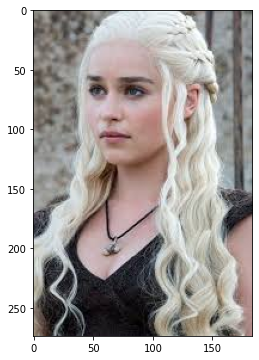

In [52]:
#Landmark model location
Predictor_Path = '/content/shape_predictor_5_face_landmarks.dat'

#Initializing face detector.Dlib has a built-in face detector which can be accessed using 
#get_frontal_face_detector().

faceDetector = dlib.get_frontal_face_detector()

# The landmark detector is implemented in the shape_predictor class
landmarkDetector = dlib.shape_predictor(Predictor_Path)

# Read image. Prior to this GOT.jpg needs to be uploaded manually to colab
imageFilename = '/content/GOT.jpg'
im = cv2.imread(imageFilename)

# Display the original image
plt.imshow(im[:,:,::-1])
plt.show()

In [53]:
# Detect Landmarks
points = fbc.getLandmarks(faceDetector, landmarkDetector, im)

points = np.array(points)

# Convert image to floating point in the range from 0 to 1
im = np.float32(im)/255.0

In [54]:
len(points)

5

In [55]:
points.shape

(5, 2)

#### Specify the size of the aligned face image. Compute the normalized image by using the similarity transform.

In [56]:
# Dimensions of o/p image
h = 600
w = 600

# Normalize the image to O/P coordinates
imNorm, points = fbc.normalizeImagesAndLandmarks((h, w), im, points)

imNorm = np.uint8(imNorm * 255)

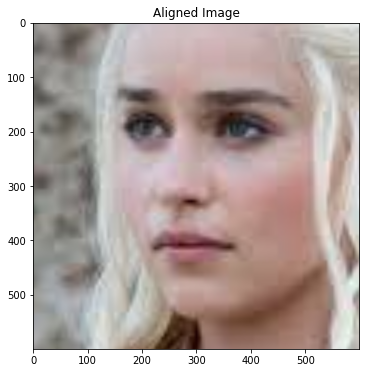

In [57]:
#Display the result
plt.imshow(imNorm[:, :, ::-1])
plt.title("Aligned Image")
plt.show()